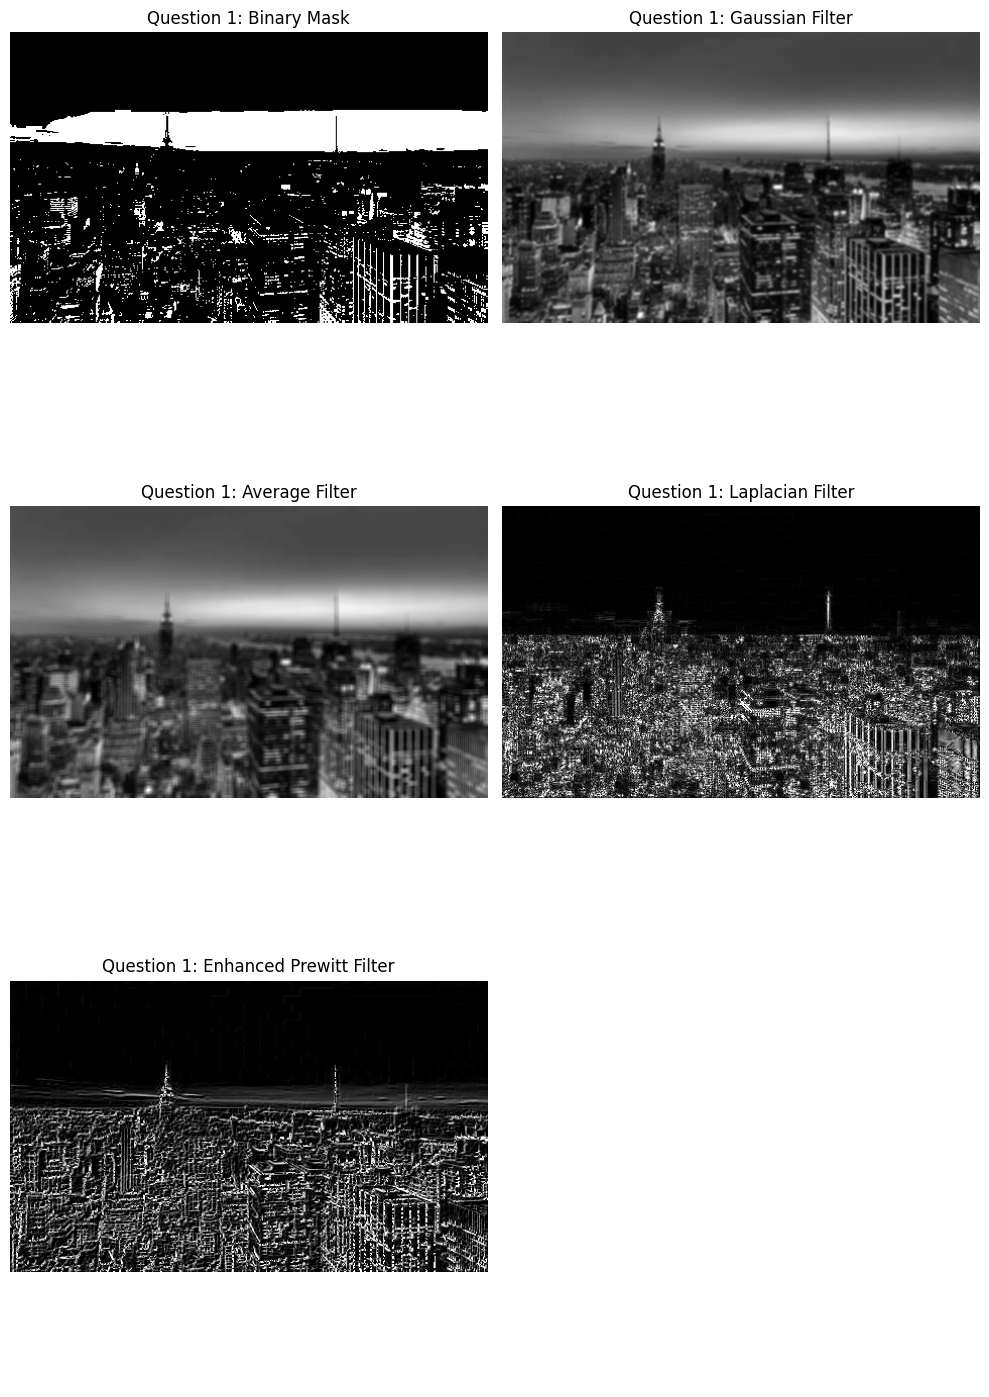

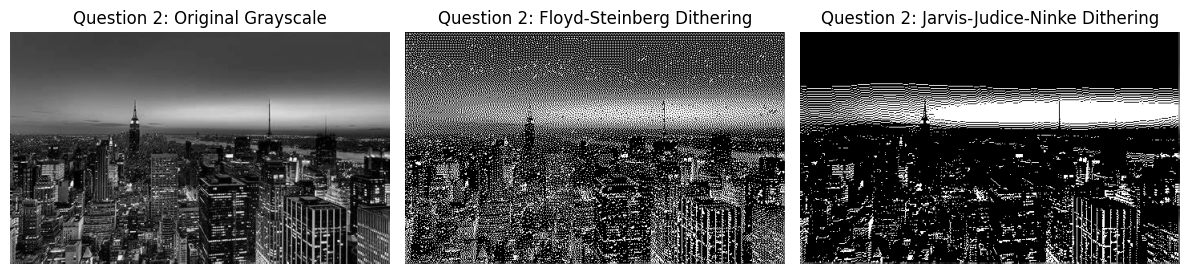

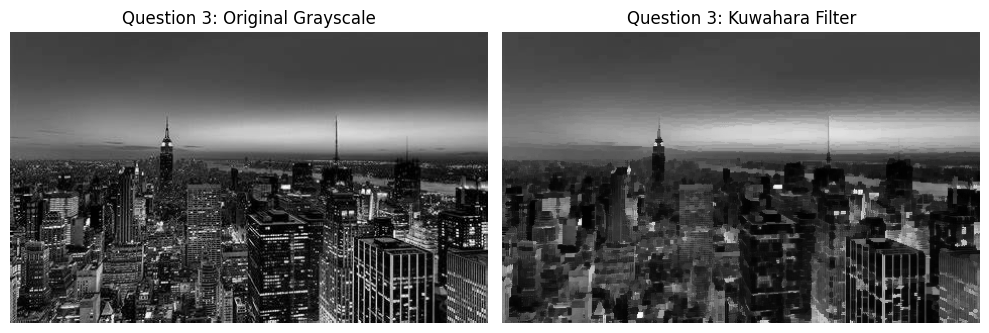

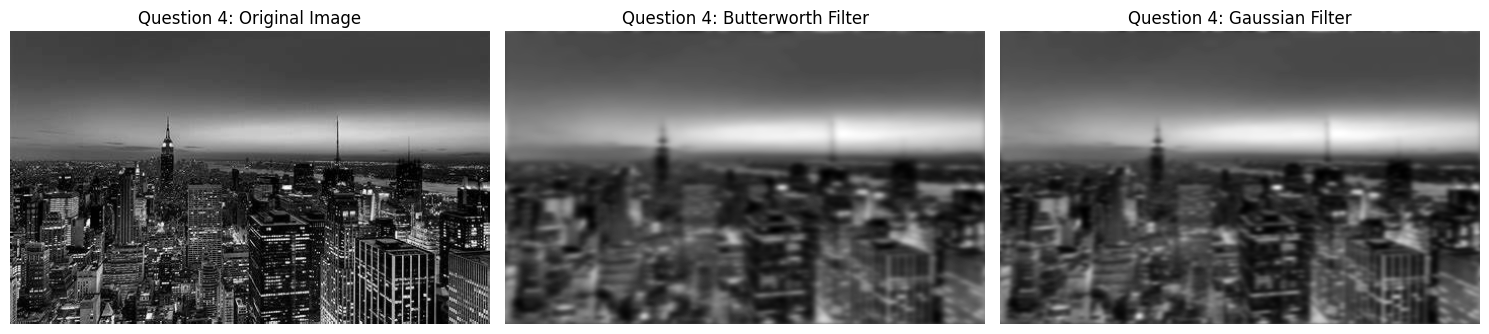

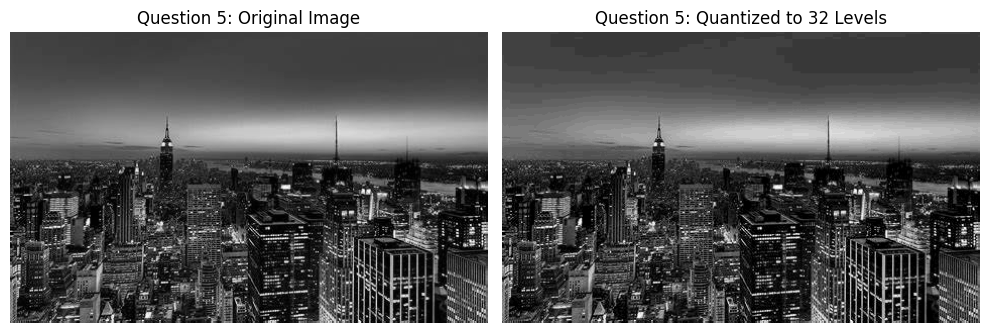

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.ndimage import generic_filter
from skimage.util import view_as_windows

# Load the image
swet002 = cv2.imread("C:/Users/swetha/OneDrive/Desktop/swetha_dip2.jpeg")
swet002_gray = cv2.cvtColor(swet002, cv2.COLOR_BGR2GRAY)

# Question 1: Apply filters and create a binary mask
# Create a binary mask for the region of interest
_, swet2_mask = cv2.threshold(swet002_gray, 120, 255, cv2.THRESH_BINARY)

# Apply Gaussian and Average filters (Low-pass filters)
swet2_gaussian_blur = cv2.GaussianBlur(swet002_gray, (5, 5), 0)
swet2_average_blur = cv2.blur(swet002_gray, (5, 5))

# Apply Laplacian and enhanced Prewitt filters (High-pass filters)
swet2_laplacian = cv2.Laplacian(swet002_gray, cv2.CV_64F)
swet2_laplacian = cv2.convertScaleAbs(swet2_laplacian)  # Convert back to uint8
swet2_prewitt_kernel_horizontal = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
swet2_prewitt_kernel_vertical = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
swet2_prewitt_horizontal = cv2.filter2D(swet002_gray, -1, swet2_prewitt_kernel_horizontal)
swet2_prewitt_vertical = cv2.filter2D(swet002_gray, -1, swet2_prewitt_kernel_vertical)
swet2_prewitt = swet2_prewitt_horizontal + swet2_prewitt_vertical
swet2_prewitt_normalized = cv2.normalize(swet2_prewitt, None, 0, 255, cv2.NORM_MINMAX)

# Display results for Question 1
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
ax = axes.ravel()
ax[0].imshow(swet2_mask, cmap='gray')
ax[0].set_title("Question 1: Binary Mask")
ax[1].imshow(swet2_gaussian_blur, cmap='gray')
ax[1].set_title("Question 1: Gaussian Filter")
ax[2].imshow(swet2_average_blur, cmap='gray')
ax[2].set_title("Question 1: Average Filter")
ax[3].imshow(swet2_laplacian, cmap='gray')
ax[3].set_title("Question 1: Laplacian Filter")
ax[4].imshow(swet2_prewitt_normalized, cmap='gray')
ax[4].set_title("Question 1: Enhanced Prewitt Filter")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 2: Implement Dithering Algorithms
# Load image and convert to grayscale
swet2_pil = Image.open("C:/Users/swetha/OneDrive/Desktop/swetha_dip2.jpeg").convert('L')

# Floyd-Steinberg Dithering
def swet2_floyd_steinberg_dithering(image):
    pix = np.array(image)
    for i in range(image.size[1] - 1):
        for j in range(image.size[0] - 1):
            old_pixel = pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            if j + 1 < image.size[0]:
                pix[i, j + 1] += quant_error * 7 / 16
            if i + 1 < image.size[1]:
                pix[i + 1, j] += quant_error * 5 / 16
                if j + 1 < image.size[0]:
                    pix[i + 1, j + 1] += quant_error * 1 / 16
                if j - 1 >= 0:
                    pix[i + 1, j - 1] += quant_error * 3 / 16
    return Image.fromarray(pix)

# Jarvis-Judice-Ninke Dithering
def swet2_jarvis_judice_ninke_dithering(image):
    pix = np.array(image)
    for i in range(image.size[1] - 2):
        for j in range(image.size[0] - 2):
            old_pixel = pix[i, j]
            new_pixel = np.round(old_pixel / 255) * 255
            pix[i, j] = new_pixel
            quant_error = old_pixel - new_pixel
            for k in range(3):
                if j + k - 1 < image.size[0] and i + 1 < image.size[1]:
                    pix[i + 1, j + k - 1] += quant_error * (1 / 48 if k == 0 else 5 / 48 if k == 1 else 3 / 48)
                if j + k - 1 < image.size[0] and i + 2 < image.size[1]:
                    pix[i + 2, j + k - 1] += quant_error * (1 / 48 if k == 0 else 3 / 48 if k == 1 else 1 / 48)
    return Image.fromarray(pix)

# Apply Dithering
swet2_fs_image = swet2_floyd_steinberg_dithering(swet2_pil)
swet2_jjn_image = swet2_jarvis_judice_ninke_dithering(swet2_pil)

# Display results for Question 2
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].imshow(swet2_pil, cmap='gray')
ax[0].set_title("Question 2: Original Grayscale")
ax[1].imshow(swet2_fs_image, cmap='gray')
ax[1].set_title("Question 2: Floyd-Steinberg Dithering")
ax[2].imshow(swet2_jjn_image, cmap='gray')
ax[2].set_title("Question 2: Jarvis-Judice-Ninke Dithering")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 3: Kuwahara Filter
# Kuwahara filter implementation
def swet2_kuwahara_filter(image, window_size):
    hsize = window_size // 2
    padded_image = np.pad(image, hsize, mode='reflect')
    output_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_image[i:i + window_size, j:j + window_size]
            regions = [
                window[:hsize + 1, :hsize + 1],
                window[:hsize + 1, hsize:],
                window[hsize:, :hsize + 1],
                window[hsize:, hsize:]
            ]
            mean_variances = [(np.mean(region), np.var(region)) for region in regions]
            output_image[i, j] = min(mean_variances, key=lambda x: x[1])[0]

    return output_image

# Apply the Kuwahara filter with a window size of 5x5
swet2_kuwahara_result = swet2_kuwahara_filter(swet002_gray, 5)

# Display the original and Kuwahara filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(swet002_gray, cmap='gray')
plt.title("Question 3: Original Grayscale")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(swet2_kuwahara_result, cmap='gray')
plt.title("Question 3: Kuwahara Filter")
plt.axis('off')
plt.tight_layout()
plt.show()

# Question 4: Fourier Transform and Filtering
# Apply Fourier Transform
swet2_f_transform = np.fft.fft2(swet002_gray)
swet2_f_shift = np.fft.fftshift(swet2_f_transform)  # Shift the zero frequency component to the center

# Create Butterworth Low-Pass Filter
def swet2_butterworth_filter(shape, cutoff, order):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    butterworth = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            butterworth[u, v] = 1 / (1 + (distance / cutoff) ** (2 * order))
    return butterworth

# Create Gaussian Low-Pass Filter
def swet2_gaussian_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    gauss = np.zeros((rows, cols))
    for u in range(rows):
        for v in range(cols):
            distance = np.sqrt((u - crow) ** 2 + (v - ccol) ** 2)
            gauss[u, v] = np.exp(-(distance ** 2) / (2 * (cutoff ** 2)))
    return gauss

# Apply Butterworth Filter
swet2_butter_filter = swet2_butterworth_filter(swet002_gray.shape, cutoff=30, order=2)
swet2_f_butter = swet2_f_shift * swet2_butter_filter
swet2_butter_img = np.abs(np.fft.ifft2(np.fft.ifftshift(swet2_f_butter)))

# Apply Gaussian Filter
swet2_gauss_filter = swet2_gaussian_filter(swet002_gray.shape, cutoff=30)
swet2_f_gauss = swet2_f_shift * swet2_gauss_filter
swet2_gauss_img = np.abs(np.fft.ifft2(np.fft.ifftshift(swet2_f_gauss)))

# Display original and filtered images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(swet002_gray, cmap='gray')
ax[0].set_title("Question 4: Original Image")
ax[1].imshow(swet2_butter_img, cmap='gray')
ax[1].set_title("Question 4: Butterworth Filter")
ax[2].imshow(swet2_gauss_img, cmap='gray')
ax[2].set_title("Question 4: Gaussian Filter")
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

# Question 5: Quantize Image to 32 Grayscale Levels
# Quantize to 32 grayscale levels
swet2_quantized_image = (swet002_gray // 8) * 8  # Dividing and then multiplying to create 32 levels

# Display original and quantized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(swet002_gray, cmap='gray')
plt.title("Question 5: Original Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(swet2_quantized_image, cmap='gray')
plt.title("Question 5: Quantized to 32 Levels")
plt.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
Question 1: Binary masks, low-pass and high-pass filters
The goal of this section was to construct a binary mask and implement both low-pass (Gaussian and Average filters) and high-pass (Laplacian and Prewitt filters).

Binary mask: A binary mask is improved by using a threshold function that divides the image into black and white based on intensity.
Gaussian and Average Filters: Both filters were able to smooth the image. The Gaussian filter produces a more subtle blur, while the Average filter produces a more uniform blur.
Laplacian Filter: The Laplacian filter emphasizes high frequency information and highlights the edges of the image as expected.
Prewitt filter: The enhanced Prewitt filter detected edges in the horizontal and vertical directions. The combination of these results reveals structural issues in the figure.
Results: The images show the expected results, which tend to see edges and blur depending on the filters used.

Question 2: Dithering algorithm
Two dithering algorithms, Floyd-Steinberg and Jarvis-Judis-Ninke, were used.

Floyd-Steinberg Dithering: The dithering effect was effectively exploited, creating a pixelated binary-like image with a visible dithering pattern. This propagation error causes sharp transitions between energy levels.
Jarvis-Judis-Ninke dithering: The larger error propagation kernel gave better conversion between the shadows in the image compared to Floyd-Steinberg typical Jarvis-Judis-Ninke dithering
Results: The visual results are consistent with the expected behavior of the algorithm, with sharp changes in the Floyd-Steinberg results, and Jarvis-Judis-Ninke for the results slowly.



    Question 3: Kuwaha filter
A Kuwahara filter with a 5x5 window is used to achieve edge-preserving smoothing.

Applications: The Kuwahara filter was able to smooth out the areas while preserving the edges. It divides the filter window into overlapping areas, and identifies a region with low contrast to retain important information.
Results: The figure shows the expected smoothing effects in homogeneous areas while maintaining the sharpness of the facial edges.

Question 4: Fourier transform using Butterworth and Gaussian filters
The task here was to apply Fourier Transform to the image and Butterworth and Gaussian filters for frequency-domain filtering.

Fourier transform: Properly applied transformation, zero-frequency component shifted to center.
Butterworth filter: The Butterworth low pass filter smoothed the image very well, with a highly calibrated cutoff frequency, making the image smoother
Gaussian Filter: The Gaussian filter also applied smoothing, progressively blurring the image.
Results: Filtered images reveal the effects of both low-pass filters, with the Butterworth filter resulting in sharper cuts than the Gaussian filter

Question 5: Number up to 32 grayscale levels
The goal was to scale up to 32 images, which reduced the grayscale.

Analytical design: The image was divided into 32 different intensity values, which reduced the number of shadows while preserving key structural details
Results: The figure shows the expected reduction in detail, but still retains the important features, and shows the effectiveness of the quantization process.